# Bibineyshvili, et al. 2019 plot code

# Figure 1
## G

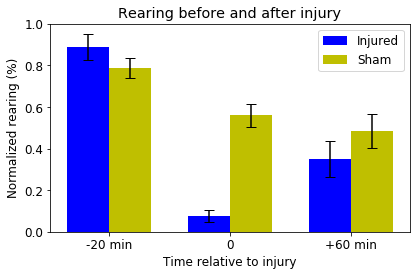

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd

plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 12})
plt.rcParams['savefig.bbox'] = 'tight'


mat = scipy.io.loadmat('normRearing.mat')
nR = mat['nR']
injured = nR[:,(0,2,4)]
sham = nR[:,(1,3,5)]

avg_injured = np.nanmean(injured, axis=0) 
avg_sham = np.nanmean(sham, axis=0)

sem_injured = (np.nanstd(injured, axis=0)/np.sqrt(sum(~np.isnan(injured))))
sem_sham = (np.nanstd(sham, axis=0)/np.sqrt(sum(~np.isnan(sham))))

n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_injured, bar_width, color='b', label='Injured', yerr=sem_injured, capsize=5)

rects2 = plt.bar(index + bar_width, avg_sham, bar_width, color='y', label='Sham', yerr=sem_sham, capsize=5)

plt.xlabel('Time relative to injury')
plt.ylabel('Normalized rearing (%)')
plt.title('Rearing before and after injury')
plt.xticks(index + 0.5*(bar_width), ('-20 min', '0', '+60 min'))
plt.legend()

plt.tight_layout()
plt.show()


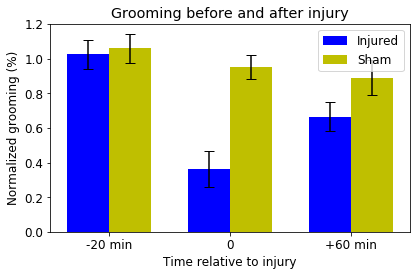

In [14]:
mat = scipy.io.loadmat('normGrooming.mat')
nG = mat['nG']
injured = nG[:,(0,2,4)]
sham = nG[:,(1,3,5)]

avg_injured = np.nanmean(injured, axis=0) 
avg_sham = np.nanmean(sham, axis=0)

sem_injured = (np.nanstd(injured, axis=0)/np.sqrt(sum(~np.isnan(injured))))
sem_sham = (np.nanstd(sham, axis=0)/np.sqrt(sum(~np.isnan(sham))))

n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_injured, bar_width, color='b', label='Injured', yerr=sem_injured, capsize=5)

rects2 = plt.bar(index + bar_width, avg_sham, bar_width, color='y', label='Sham', yerr=sem_sham, capsize=5)

plt.xlabel('Time relative to injury')
plt.ylabel('Normalized grooming (%)')
plt.title('Grooming before and after injury')
plt.xticks(index + 0.5*(bar_width), ('-20 min', '0', '+60 min'))
plt.legend()

plt.tight_layout()
plt.show()

# Figure 2
## F

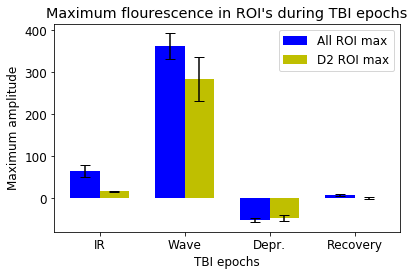

In [15]:
mat = scipy.io.loadmat('fig2_F.mat')
ROI = mat['resultsEvMouse']
Max_ROI = ROI[:,(0,2,4,6)]
D2_ROI = ROI[:,(1,3,5,7)]

avg_Max_ROI = np.nanmean(Max_ROI, axis=0) 
avg_D2_ROI = np.nanmean(D2_ROI, axis=0)

sem_Max_ROI = (np.nanstd(Max_ROI, axis=0)/np.sqrt(sum(~np.isnan(Max_ROI))))
sem_D2_ROI = (np.nanstd(D2_ROI, axis=0)/np.sqrt(sum(~np.isnan(D2_ROI))))

n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, avg_Max_ROI, bar_width, color='b', label='All ROI max', yerr=sem_Max_ROI, capsize=5)

rects2 = plt.bar(index + bar_width, avg_D2_ROI, bar_width, color='y', label='D2 ROI max', yerr=sem_D2_ROI, capsize=5)

plt.xlabel('TBI epochs')
plt.ylabel('Maximum amplitude')
plt.title("Maximum flourescence in ROI's during TBI epochs")
plt.xticks(index + 0.5*(bar_width), ('IR', 'Wave', 'Depr.', 'Recovery'))
plt.legend()

plt.tight_layout()
plt.show()

# Figure 3
## E

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


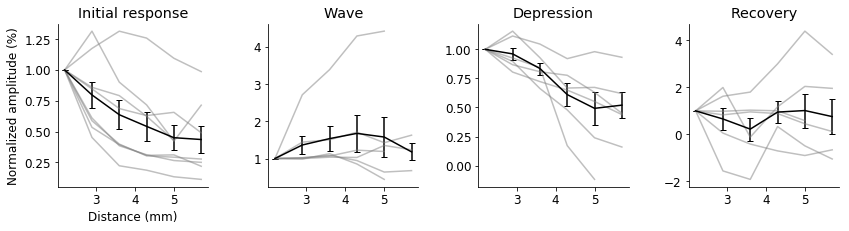

In [16]:
mat = scipy.io.loadmat('fig3_E.mat')

Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance (mm)')

plt.show()

## F

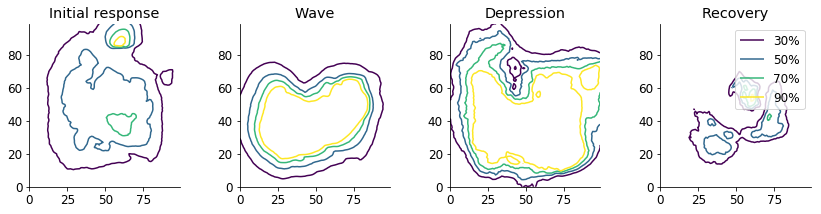

In [90]:
mat = scipy.io.loadmat('fig3_F.mat')

Data = mat['Cont']
Levels = mat['Levels']


# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    if j is not 2:
        cs = ax[j].contour(Data[:,:,j].T, Levels[::-1,j])
    if j is 2:
        ax[j].contour(Data[:,:,j].T, Levels[:,j])
        
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)

labels = ['30%','50%','70%','90%']

for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

plt.legend()
plt.show()



# Figure 4
## E

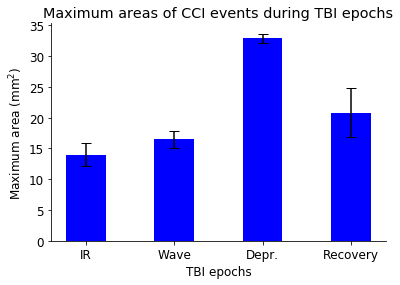

In [99]:
mat = scipy.io.loadmat('fig4_E.mat')
Carea = mat['resultEvMouse']

avg_area = np.nanmean(Carea, axis=0) 

sem_area = (np.nanstd(Carea, axis=0)/np.sqrt(sum(~np.isnan(Carea))))


n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.45

rects1 = plt.bar(index, avg_area, bar_width, color='b', yerr=sem_area, capsize=5)

plt.xlabel('TBI epochs')
plt.ylabel('Maximum area (mm$^2$)')
plt.title("Maximum areas of CCI events during TBI epochs")
plt.xticks(index, ('IR', 'Wave', 'Depr.', 'Recovery'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

# Figure 6
## H

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


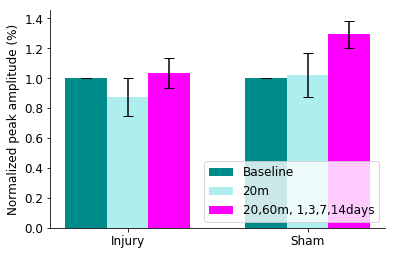

In [40]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injAmp'], mat['shamAmp']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak amplitude (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()


## I

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


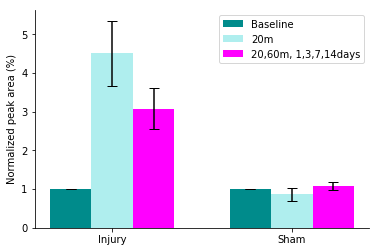

In [35]:
Data = np.dstack((mat['injArea'], mat['shamArea']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak area (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'upper right')
plt.show()

## J

/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/tomi/anaconda3/envs/caiman/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


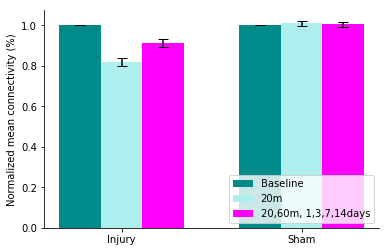

In [38]:
Data = np.dstack((mat['injCon'], mat['shamCon']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized mean connectivity (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()

# Figure 7

In [87]:
Data = pd.read_csv("TBI_Data_2019.csv")
avg_Injured = Data[Data.injured == 1].groupby('Time').mean()
avg_Sham = Data[Data.injured == 0].groupby('Time').mean()
avg_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').mean()
avg_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').mean()

sem_Injured = Data[Data.injured == 1].groupby('Time').sem()
sem_Sham = Data[Data.injured == 0].groupby('Time').sem()
sem_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').sem()
sem_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').sem()
print(avg_Injuredm.keys())

Index(['injured', 'NCaAmplit', 'NCaArea', 'Nrearing', 'Ngrooming'], dtype='object')


In [94]:
print(avg_Injured.groups())

AttributeError: 'DataFrame' object has no attribute 'groups'

## A

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

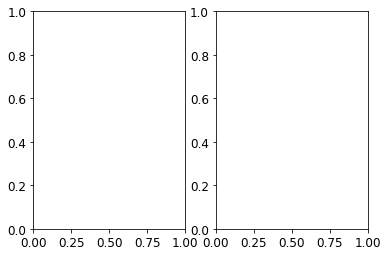

In [90]:
fig,ax = plt.subplots(1,2)
plt.subplot(121)
for key in grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(ax=ax)


In [44]:
avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance (mm)')

plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## B

In [ ]:
mat = scipy.io.loadmat('fig3_E.mat')

Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance (mm)')

plt.show()

## C

In [ ]:
mat = scipy.io.loadmat('fig3_E.mat')

Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance (mm)')

plt.show()

In [ ]:
%matplotlib inline
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sci
from matplotlib.ticker import AutoMinorLocator

minor_locator = AutoMinorLocator(2)
minor_locatorx = AutoMinorLocator(2)

plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 10})
plt.rcParams['savefig.bbox'] = 'tight'

mat = sci.loadmat('normRearing.mat')

bar_input = mat['nR']

x = np.arange(0,3000,2)

f, ax = plt.subplots(1, 4, figsize=(8.5,3))
f.subplots_adjust(wspace = 0.4)

n = 0
for j in range(0, len(ax)):
    if j < 3:
        ax[j].plot(x, bar_input[0:1500,3:7,j], '0.6',alpha = 0.5)
        ax[j].plot(x, bar_input[0:1500,0:2,j], '0.6', alpha = 0.5)
        ax[j].plot(x,bar_input[0:1500,7,j], 'k')
        ax[j].plot(x,bar_input[0:1500,2,j], 'r', alpha = 0.7)
        ax[j].set_ylim(-3,15)
        ax[j].set_xlim(700,2500)
        ax[j].spines['top'].set_visible(False)
        ax[j].spines['right'].set_visible(False)
        ax[j].spines['bottom'].set_linewidth(0.5)
        ax[j].spines['left'].set_linewidth(0.5)
    if j > 0:
        ax[j].spines['left'].set_visible(False)
        ax[j].yaxis.set_visible(False)
    if j == 3:
        ax[j].plot(x, bar_input[0:1500,0,j], '0.6')
        ax[j].set_ylim(-3,15)
        ax[j].set_xlim(700,2500)
        ax[j].spines['top'].set_visible(False)
        ax[j].spines['right'].set_visible(False)
        ax[j].spines['bottom'].set_linewidth(0.5)
        ax[j].spines['left'].set_linewidth(0.5)
    
ax[0].set_ylabel('Angle (\xb0)')
ax[0].set_xlabel('Time (ms)')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
minor_locatorx = AutoMinorLocator(2) #Need to declare a unique MinorLocator object for each Y-axis


plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 10})
plt.rcParams['savefig.bbox'] = 'tight'


Data = pd.read_excel('TBI_Data_2019.xlsx')

Average = Data.mean()
Error = Data.sem()

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.5
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia','violet']
rects = [0]*4 #Pre-alocate list
for x in range(0, 4):
    rects[x] = ax.bar(ind[0] + (width * x), Average[x], width, color=color_vector[x], yerr=Error[x], capsize=5)

    
# add some text for labels, title and axes ticks
ax.set_ylabel('Peak amplitude (\xb0)')
ax.set_xticks(ind + (width*3) / 2)
ax.set_yticks([0,10,20,30])
ax.set_xticklabels(('Amplitude', 'Velocity'))
ax.set_ylim(0,30)
ax.yaxis.set_minor_locator(minor_locator)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)
ax.spines['top'].set_visible(False)

ax2 = ax.twinx()

for x in range(0, 4):
    ax2.bar(ind[1] + (width * x), Average[x+4], width, color=color_vector[x], yerr=Error[x+4], capsize=5)

ax2.set_ylabel('Peak velocity (\xb0/s)')
ax2.set_yticks([0,400,800,1200])
ax2.set_ylim(0,1200)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_minor_locator(minor_locatorx)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=3)

fig = plt.gcf()
fig.set_size_inches(7,5)
ax.legend((rects[0], rects[1], rects[2], rects[3]), ('ChAT-ChR2 Pre-lesion', 'ChAT-ChR2 +24 Hours','Emx1-ChR2 Pre-lesion','Emx1-ChR2 Day +7'),fontsize = 9, loc = 'upper left')
plt.show()
